In [2]:
%reload_ext nb_black

<IPython.core.display.Javascript object>

## Day 34 Lecture 2 Assignment

In this assignment, we will learn about gradient boosting. We will use a dataset of house information in Ames, Iowa, predicting sale price.

In [23]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor

from category_encoders import LeaveOneOutEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

<IPython.core.display.Javascript object>

In [3]:
house = pd.read_csv(
    "https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/houseprices.csv"
)
print(house.shape)
house.head()

(1460, 81)


,id,mssubclass,mszoning,lotfrontage,lotarea,street,alley,lotshape,landcontour,utilities,...,poolarea,poolqc,fence,miscfeature,miscval,mosold,yrsold,saletype,salecondition,saleprice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


<IPython.core.display.Javascript object>

Check for nulls. Remove any columns with more than 100 nulls, then drop any remaining rows with nulls after that.

In [13]:
# your work here
counts = house.isna().sum().sort_values(ascending=False)
drop_cols = counts[counts > 100].index
drop_cols

Index(['poolqc', 'miscfeature', 'alley', 'fence', 'fireplacequ',
       'lotfrontage'],
      dtype='object')

<IPython.core.display.Javascript object>

In [14]:
house = house.drop(drop_cols, 1)
house = house.dropna()

<IPython.core.display.Javascript object>

In [17]:
house = house.drop("id", 1)

<IPython.core.display.Javascript object>

One hot encode your categorical features using get_dummies.

In [19]:
# your work here
house_dum = pd.get_dummies(house)

<IPython.core.display.Javascript object>

Take a look at your outcome variable. It is highly skewed, and has a few very rare large outliers.

Let's try log transforming the y variable.

In [25]:
# your work here
X = house_dum.drop("saleprice", 1)
y = np.log(house_dum["saleprice"])

<IPython.core.display.Javascript object>

We know that there are some rare large values. We can make sure that the training and test sets have about the same distribution by stratifying the train-test split.

Split your training and test sets, with a test size of 0.2. Use the given helper function to stratify the continuous outcome. Remember that the outcome variable is now the **log of sale price**.

In [26]:
def binned(y, num_bins):
    # Creates an object to put in the stratify keyword in train_test_split
    # Specify number of bins to separate your y variable
    ymin, ymax = y.min(), y.max()
    bins = np.linspace(ymin, ymax, num_bins + 1)[:-1]
    y_binned = np.digitize(y, bins)
    return y_binned

<IPython.core.display.Javascript object>

In [27]:
# your work here
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=binned(y, 10)
)

<IPython.core.display.Javascript object>

Create a Gradient Boosting Regressor model. Measure the MAE (Mean Absolute Error) for the training and testing sets.

In [28]:
# your work here
model = GradientBoostingRegressor()
model.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

<IPython.core.display.Javascript object>

In [29]:
model.score(X_train, y_train)

0.9620660823750475

<IPython.core.display.Javascript object>

In [30]:
model.score(X_test, y_test)

0.8167534336146735

<IPython.core.display.Javascript object>

In [31]:
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

mae_train = np.mean(np.abs(y_pred_train - y_train))
mae_test = np.mean(np.abs(y_pred_test - y_test))

print(f"MAE on the training: {mae_train:.2f} and testing: {mae_test:.2f}")

MAE on the training set 0.06 and testing: 0.09


<IPython.core.display.Javascript object>

Create a grid search. Try varying subsample, learning rate, and max features. Use MAE as your scoring metric.

<IPython.core.display.Javascript object>

In [38]:
n_trees = 100
rates = [2, 4, 6, 8]
learning_rates = [x / n_trees for x in rates]
grid = {
    "subsample": [0.5, 0.75, 1.0],
    "max_features": [0.4, 0.6, 0.8, 1.0],
    "learning_rate": learning_rates,
}
model_cv = GridSearchCV(
    GradientBoostingRegressor(n_estimators=n_trees), grid, verbose=1, n_jobs=-1
)
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:    4.5s
[Parallel(n_jobs=-1)]: Done 188 tasks      | elapsed:   15.2s
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:   19.3s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0,
                                                 criterion='friedman_mse',
                                                 init=None, learning_rate=0.1,
                                                 loss='ls', max_depth=3,
                                                 max_features=None,
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100,
                                                 n_ite..._change=None,
               

<IPython.core.display.Javascript object>

In [44]:
model_cv.best_params_

{'learning_rate': 0.08, 'max_features': 0.8, 'subsample': 0.5}

<IPython.core.display.Javascript object>

In [45]:
model_cv.score(X_train, y_train)

0.9545361694169558

<IPython.core.display.Javascript object>

In [46]:
model_cv.score(X_test, y_test)

0.8101925250062483

<IPython.core.display.Javascript object>

In [47]:
y_pred_train = model_cv.predict(X_train)
y_pred_test = model_cv.predict(X_test)

mae_train = np.mean(np.abs(y_pred_train - y_train))
mae_test = np.mean(np.abs(y_pred_test - y_test))

print(f"MAE on the training: {mae_train:.2f} and testing: {mae_test:.2f}")

MAE on the training: 0.06 and testing: 0.09


<IPython.core.display.Javascript object>

Create residual plots of the training and test sets and interpret your results.

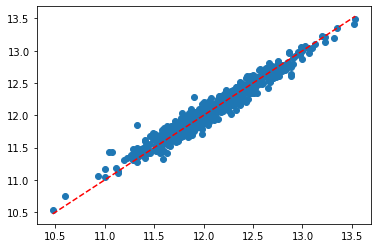

<IPython.core.display.Javascript object>

In [50]:
# your work here
mn = y_train.min()
mx = y_train.max()

plt.scatter(y_train, y_pred_train)
plt.plot([mn, mx], [mn, mx], "--", c="r")

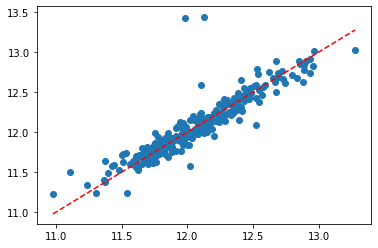

<IPython.core.display.Javascript object>

In [51]:
mn = y_test.min()
mx = y_test.max()

plt.scatter(y_test, y_pred_test)
plt.plot([mn, mx], [mn, mx], "--", c="r")